In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/elena/Projects/HR_Analysis/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("data/aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
"There are {}, or {}%, people looking for a new job, while {}, or {}% are not. In total participans {}.".format(df[df["target"]==1].count()[0], round((df[df["target"]==1].count()[0]/df.shape[0])*100,2), df[df["target"]==0].count()[0], round((df[df["target"]==0].count()[0]/df.shape[0])*100,2), df["enrollee_id"].unique().shape[0])

'There are 4777, or 24.93%, people looking for a new job, while 14381, or 75.07% are not. In total participans 19158.'

In [5]:
df["target_new"] = df["target"]
df['target_new'] = df['target_new'].replace(1,"looking")
df['target_new'] = df['target_new'].replace(0,"not_looking")

In [6]:
df = df.fillna("unkown")

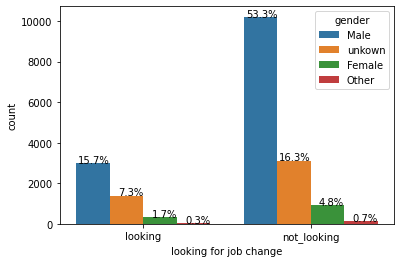

In [7]:
ax = sns.countplot(x="target_new",data=df, hue="gender")
total =float(len(df))

plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('blog/gender_overview.png')
plt.show()

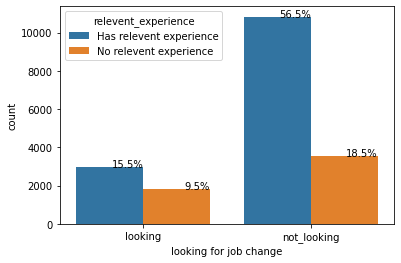

In [8]:
ax = sns.countplot(x="target_new",data=df, hue="relevent_experience")
total =float(len(df))

plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig("blog/relevant_experience.png")
plt.show()

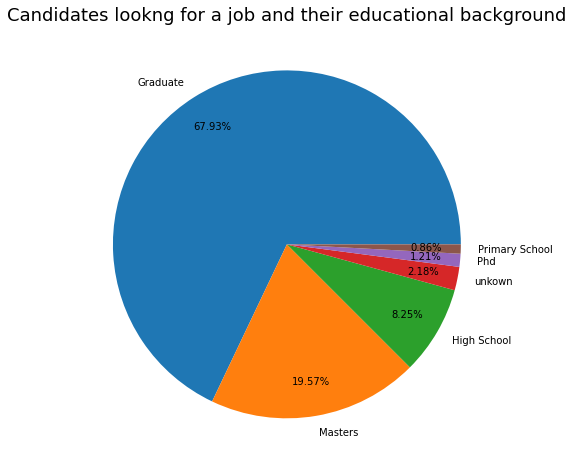

In [68]:
education_level = df[df['target'] == 1]['education_level']
values = education_level.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Candidates lookng for a job and their educational background', fontsize=18);
plt.savefig("blog/education_target1.png")
plt.show()


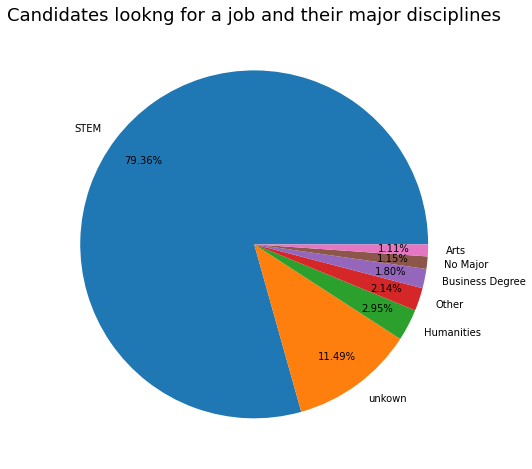

In [69]:
major_discipline = df[df['target'] == 1]['major_discipline']
values = major_discipline.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Candidates lookng for a job and their major disciplines', fontsize=18)
plt.savefig("blog/major_discipline_target1.png")
plt.show()

In [9]:
df["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', 'unkown'], dtype=object)

In [11]:
order = ['never', '1', '2', '3', '4', '>4', 'unknown']

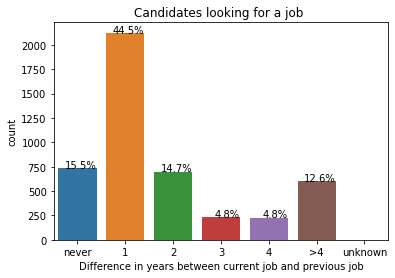

In [12]:
ax = sns.countplot(x="last_new_job",data=df[df['target']==1], order=order)
total_1 =float(len(df[df['target']==1]))
plt.title("Candidates looking for a job ")
plt.xlabel("Difference in years between current job and previous job")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('blog/last_new_job.png')
plt.show()

In [14]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'unkown'],
      dtype=object)

In [18]:
order2=['<1', '1', '2', '3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20','unknown']

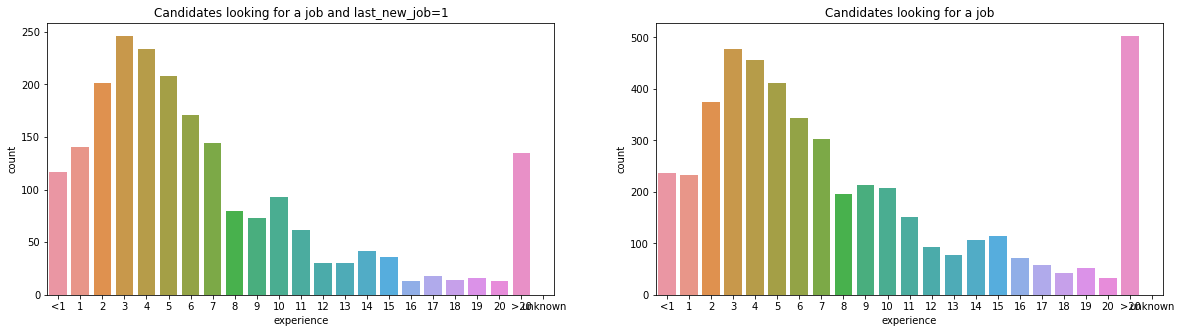

In [65]:
fig, axs = plt.subplots(1, 2,figsize=(20,5))

sns.countplot(x="experience",data=df1[df1['last_new_job']=='1'], order=order2, ax=axs[0])
axs[0].set_title('Candidates looking for a job and last_new_job=1')
sns.countplot(x="experience",data=df[df['target']==1], order=order2, ax=axs[1])
axs[1].set_title('Candidates looking for a job')
plt.savefig('blog/experience1.png')
plt.show()

In [46]:
df1_exp = df1.copy()
df1_exp = df1_exp[df1_exp.experience != "unkown"]

In [47]:
df1_exp['experience'] = df1_exp['experience'].replace("<1","0")
df1_exp['experience'] = df1_exp['experience'].replace(">20","21")
df1_exp['experience'] = df1_exp['experience'].astype(int)

In [48]:
df1_exp[df1_exp['last_new_job']=='1']["experience"].mean(), df1_exp["experience"].mean()

(6.73062381852552, 8.020193521245266)

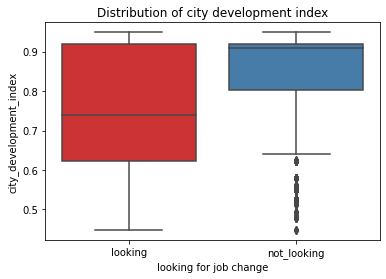

In [14]:
sns.boxplot(x="target_new",y="city_development_index",data=df,palette="Set1")
plt.title("Distribution of city development index")
plt.xlabel("looking for job change")
plt.savefig('blog/cdi.png')
plt.show()

In [15]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df["target"], df["city_development_index"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.342
